<a href="https://colab.research.google.com/github/sandovalmedeiros/PythonGeo/blob/main/Testes_Curso_Python_Geo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exemplos de uso das Bibliotecas específicas na área de Geoprocessamento

## **Manipulando a biblioteca rasterio para manupulação de dados do tipo Raster**

In [ ]:
!pip install contextily

In [ ]:
from osgeo import gdal

# Abrir um arquivo raster
raster_file = '/content/sample_data/teste/rectifyderba_2000.tif'
dataset = gdal.Open(raster_file)

# Obter informações do raster
projecao = dataset.GetProjection()
largura = dataset.RasterXSize
altura = dataset.RasterYSize
numero_bandas = dataset.RasterCount

# Fechar o dataset
dataset = None


In [ ]:
# Usando a biblioteca rasterio em substituição ao GDAL para manipular arquivo raster
import rasterio

# Abrir um arquivo raster
raster_file = '/content/sample_data/teste/MI_1436-4-SO_REP_comprimido.tif'
with rasterio.open(raster_file) as src:
    # Realizar operações de leitura e manipulação do raster
    # Exemplo: obter metadados
    meta = src.meta
    print(meta)


{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 19982, 'height': 20014, 'count': 3, 'crs': CRS.from_epsg(4674), 'transform': Affine(7.248371744988034e-06, 0.0, -41.759618906578574,
       0.0, -7.248371744988034e-06, -8.864579093219263)}


Metadados do Raster:
Extensão Espacial: BoundingBox(left=-41.759618906578574, bottom=-9.009648005323452, right=-41.61478194237022, top=-8.864579093219263)
Resolução: (7.248371744988034e-06, 7.248371744988034e-06)
Sistema de Referência Espacial (CRS): EPSG:4674
Número de Bandas: 3


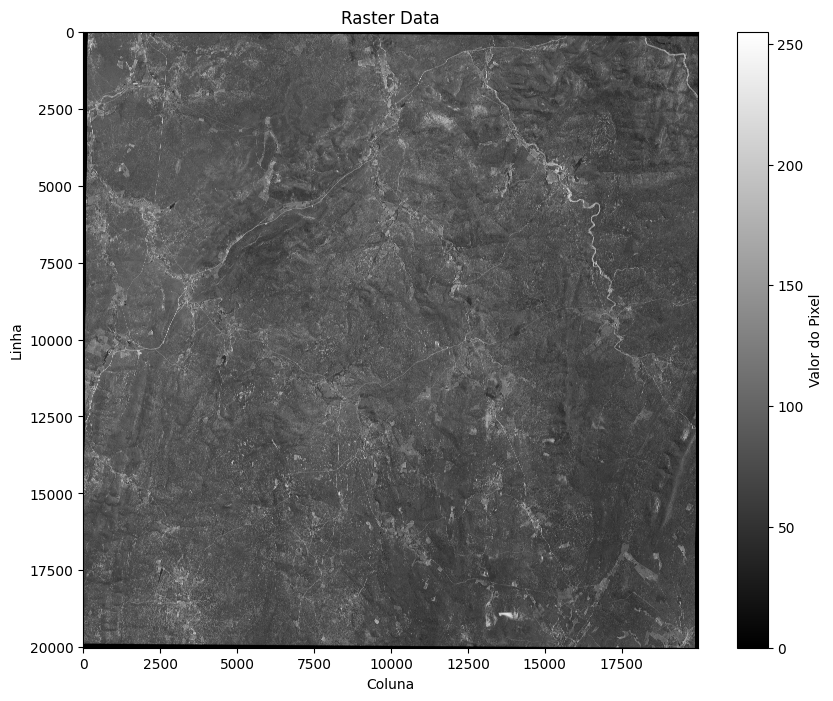

In [ ]:
import rasterio

# Abrir um arquivo raster
raster_file = '/content/sample_data/teste/MI_1436-4-SO_REP_comprimido.tif'
with rasterio.open(raster_file) as src:
    # Ler os dados raster da primeira banda
    raster_data = src.read(1)  # Lê os dados da primeira banda

    # Exibir os metadados do raster
    print("Metadados do Raster:")
    print("Extensão Espacial:", src.bounds)
    print("Resolução:", (src.res[0], src.res[1]))
    print("Sistema de Referência Espacial (CRS):", src.crs)
    print("Número de Bandas:", src.count)

    # Plotar o raster
    plt.figure(figsize=(10, 8))
    plt.imshow(raster_data, cmap='gray')
    plt.title('Raster Data')
    plt.colorbar(label='Valor do Pixel')
    plt.xlabel('Coluna')
    plt.ylabel('Linha')
    plt.show()


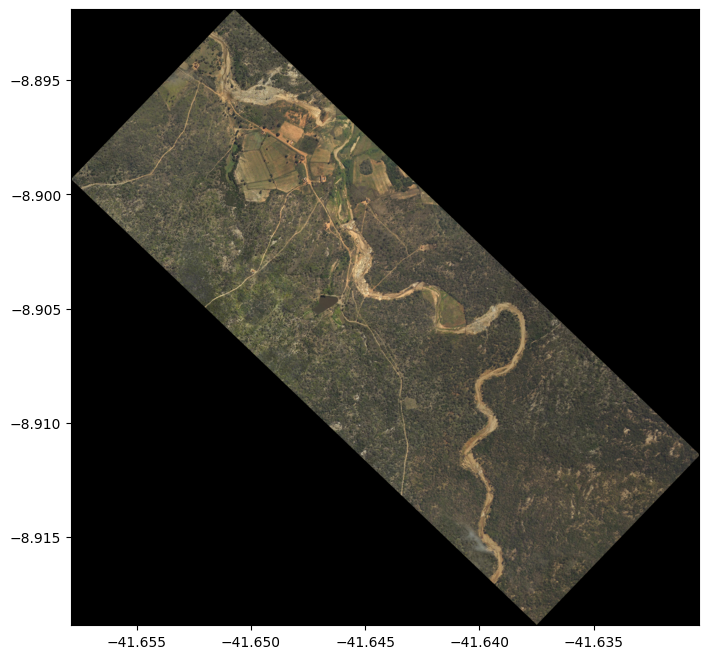

In [ ]:
# Segmentando uma área do raster
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
import geopandas as gpd

# Abrir um arquivo raster
raster_file = '/content/sample_data/teste/MI_1436-4-SO_REP_comprimido.tif'
with rasterio.open(raster_file) as src:
    # Definir uma geometria de interesse (por exemplo, um polígono)
    geometria = gpd.read_file('/content/sample_data/teste/recorte')
    geoms = geometria.geometry.values.tolist()

    # Aplicar uma máscara para extrair apenas os valores dentro da geometria
    masked_data, transform = mask(src, geoms, crop=True)

    # Exibir a imagem mascarada
    plt.figure(figsize=(10, 8))
    show(masked_data, transform=transform, cmap='gray')
    #plt.title('Raster Data Mascarado')
    #plt.xlabel('Coluna')
    #plt.ylabel('Linha')
    plt.show()


In [ ]:
# Coletando os dados de uma máscara
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
import geopandas as gpd

# Abrir um arquivo raster
raster_file = '/content/sample_data/teste/MI_1436-4-SO_REP_comprimido.tif'
with rasterio.open(raster_file) as src:
    # Definir uma geometria de interesse (por exemplo, um polígono)
    geometria = gpd.read_file('/content/sample_data/teste/recorte')
    geoms = geometria.geometry.values.tolist()

    # Aplicar uma máscara para extrair apenas os valores dentro da geometria
    masked_data, transform = mask(src, geoms, crop=True)

    # Ler os dados raster da primeira banda após a aplicação da máscara
    raster_data = masked_data[0]  # Lê os dados da primeira banda

    # Exibir os metadados do raster
    print("Metadados do Raster após a Máscara:")
    print("Extensão Espacial:", src.bounds)
    print("Resolução:", (src.res[0], src.res[1]))
    print("Sistema de Referência Espacial (CRS):", src.crs)
    print("Número de Bandas:", src.count)

    # Plotar o raster após a aplicação da máscara
    plt.figure(figsize=(10, 8))
    show(raster_data, transform=transform, cmap='gray')
    plt.title('Raster Data Mascarado (Banda 1)')
    plt.xlabel('Coluna')
    plt.ylabel('Linha')
    plt.colorbar(label='Valor do Pixel')
    plt.show()


Metadados do Raster após a Máscara:
Extensão Espacial: BoundingBox(left=-41.759618906578574, bottom=-9.009648005323452, right=-41.61478194237022, top=-8.864579093219263)
Resolução: (7.248371744988034e-06, 7.248371744988034e-06)
Sistema de Referência Espacial (CRS): EPSG:4674
Número de Bandas: 3


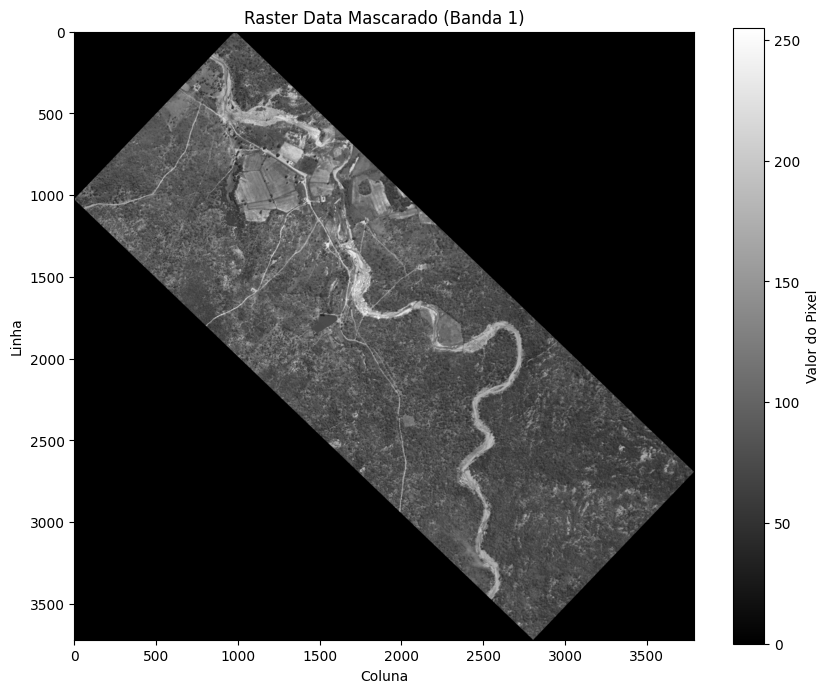

In [ ]:
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
import geopandas as gpd
import matplotlib.pyplot as plt

# Abrir um arquivo raster
raster_file = '/content/sample_data/teste/MI_1436-4-SO_REP_comprimido.tif'
with rasterio.open(raster_file) as src:
    # Definir uma geometria de interesse (por exemplo, um polígono)
    geometria = gpd.read_file('/content/sample_data/teste/recorte')
    geoms = geometria.geometry.values.tolist()

    # Aplicar uma máscara para extrair apenas os valores dentro da geometria
    masked_data, transform = mask(src, geoms, crop=True)

    # Ler os dados raster da primeira banda após a aplicação da máscara
    raster_data = masked_data[0]  # Lê os dados da primeira banda

    # Exibir os metadados do raster
    print("Metadados do Raster após a Máscara:")
    print("Extensão Espacial:", src.bounds)
    print("Resolução:", (src.res[0], src.res[1]))
    print("Sistema de Referência Espacial (CRS):", src.crs)
    print("Número de Bandas:", src.count)

    # Plotar o raster após a aplicação da máscara
    plt.figure(figsize=(10, 8))
    plt.imshow(raster_data, cmap='gray')
    plt.colorbar(label='Valor do Pixel')
    plt.title('Raster Data Mascarado (Banda 1)')
    plt.xlabel('Coluna')
    plt.ylabel('Linha')
    plt.show()


In [ ]:
raster_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

Metadados do Raster após a Máscara:
Extensão Espacial: BoundingBox(left=-41.759618906578574, bottom=-9.009648005323452, right=-41.61478194237022, top=-8.864579093219263)
Resolução: (7.248371744988034e-06, 7.248371744988034e-06)
Sistema de Referência Espacial (CRS): EPSG:4674
Transformação Afim: | 0.00, 0.00,-41.76|
| 0.00,-0.00,-8.86|
| 0.00, 0.00, 1.00|
Número de Bandas: 3


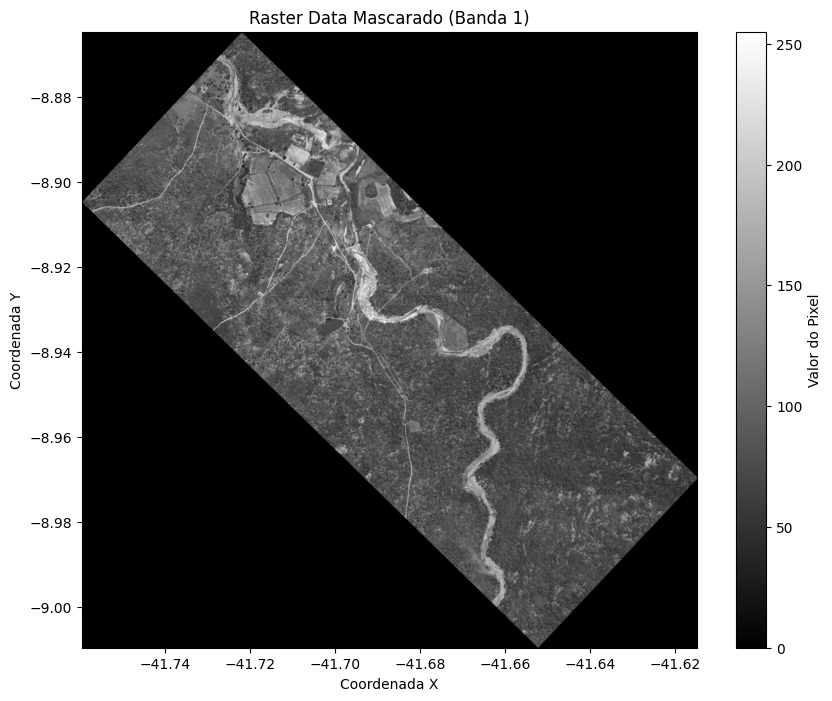

In [ ]:
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
import geopandas as gpd
import matplotlib.pyplot as plt

# Abrir um arquivo raster
raster_file = '/content/sample_data/teste/MI_1436-4-SO_REP_comprimido.tif'
with rasterio.open(raster_file) as src:
    # Definir uma geometria de interesse (por exemplo, um polígono)
    geometria = gpd.read_file('/content/sample_data/teste/recorte')
    geoms = geometria.geometry.values.tolist()

    # Aplicar uma máscara para extrair apenas os valores dentro da geometria
    masked_data, transform = mask(src, geoms, crop=True)

    # Ler os dados raster da primeira banda após a aplicação da máscara
    raster_data = masked_data[0]  # Lê os dados da primeira banda

    # Obter a transformação afim do conjunto de dados raster
    transformacao = src.transform

    # Exibir os metadados do raster
    print("Metadados do Raster após a Máscara:")
    print("Extensão Espacial:", src.bounds)
    print("Resolução:", (src.res[0], src.res[1]))
    print("Sistema de Referência Espacial (CRS):", src.crs)
    print("Transformação Afim:", transformacao)
    print("Número de Bandas:", src.count)

    # Plotar o raster após a aplicação da máscara
    plt.figure(figsize=(10, 8))
    plt.imshow(raster_data, cmap='gray', extent=(transformacao[2], transformacao[2] + transformacao[0] * src.width,
                                                  transformacao[5] + transformacao[4] * src.height, transformacao[5]))
    plt.colorbar(label='Valor do Pixel')
    plt.title('Raster Data Mascarado (Banda 1)')
    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    plt.show()


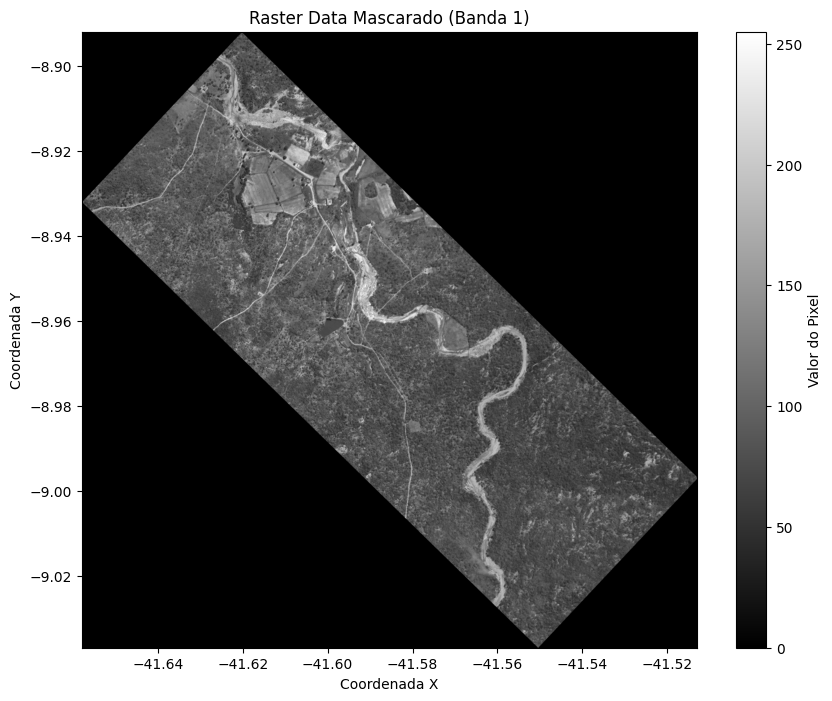

In [ ]:
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
import geopandas as gpd
import matplotlib.pyplot as plt

# Abrir um arquivo raster
raster_file = '/content/sample_data/teste/MI_1436-4-SO_REP_comprimido.tif'
with rasterio.open(raster_file) as src:
    # Definir uma geometria de interesse (por exemplo, um polígono)
    geometria = gpd.read_file('/content/sample_data/teste/recorte')
    geoms = geometria.geometry.values.tolist()

    # Aplicar uma máscara para extrair apenas os valores dentro da geometria
    masked_data, transform = mask(src, geoms, crop=True)

    # Ler os dados raster da primeira banda após a aplicação da máscara
    raster_data = masked_data[0]  # Lê os dados da primeira banda

    # Exibir os dados raster após a aplicação da máscara
    plt.figure(figsize=(10, 8))
    plt.imshow(raster_data, cmap='gray', extent=(transform[2], transform[2] + transform[0] * src.width,
                                                  transform[5] + transform[4] * src.height, transform[5]))
    plt.colorbar(label='Valor do Pixel')
    plt.title('Raster Data Mascarado (Banda 1)')
    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    plt.show()



In [ ]:
transform[8]

1.0

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

# Criar um GeoDataFrame com pontos de exemplo
data = {'ID': [1, 2, 3],
        'Nome': ['Ponto 1', 'Ponto 2', 'Ponto 3'],
        'geometry': [Point(-54, -10), Point(-53, -10.5), Point(-53.5, -10)]}
gdf = gpd.GeoDataFrame(data, crs='EPSG:4326')

# Calcular o buffer de 1 grau ao redor dos pontos
buffered_gdf = gdf.buffer(1)

# Plotar os pontos originais e seus buffers
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))
gdf.plot(ax=ax, color='blue', marker='o', label='Pontos')
buffered_gdf.plot(ax=ax, color='gray', alpha=0.5, label='Buffers')
plt.title('Pontos e Buffers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


In [ ]:
from osgeo import ogr

# Criar um novo shapefile
driver = ogr.GetDriverByName('ESRI Shapefile')
shapefile_nome = '/content/sample_data/teste/novo_shapfile_2/novo_shapefile2.shp'
datasource = driver.CreateDataSource(shapefile_nome)

# Criar uma nova camada no shapefile
srs = ogr.osr.SpatialReference()
srs.ImportFromEPSG(4674)  # Define o sistema de coordenadas SIRGAS 2000
layer = datasource.CreateLayer('nova_camada', srs, ogr.wkbPoint)

# Adicionar um campo de ID à camada
campo_id = ogr.FieldDefn('ID', ogr.OFTInteger)
layer.CreateField(campo_id)

# Criar uma nova feição (ponto) e atribuir um valor ao campo ID
ponto = ogr.Geometry(ogr.wkbPoint)
ponto.AddPoint(-12.9714, -38.5014)
feicao = ogr.Feature(layer.GetLayerDefn())
feicao.SetGeometry(ponto)
feicao.SetField('ID', 1)

# Adicionar a feição à camada
layer.CreateFeature(feicao)

# Fechar o datasource
datasource = None


In [ ]:
from osgeo import ogr

# Criar um novo shapefile tipo polígono no município de Senhor do Bonfim - BA
driver = ogr.GetDriverByName('ESRI Shapefile')
shapefile_nome = '/content/sample_data/teste/novo_shapfile_2/novo_shapefile2.shp'
datasource = driver.CreateDataSource(shapefile_nome)

# Definir o sistema de coordenadas SIRGAS 2000
srs = ogr.osr.SpatialReference()
srs.ImportFromEPSG(4674)  # SIRGAS 2000

# Criar uma nova camada no shapefile
layer = datasource.CreateLayer('nova_camada', srs, ogr.wkbPolygon)  # Mudança para wkbPolygon

# Adicionar um campo de ID à camada
campo_id = ogr.FieldDefn('ID', ogr.OFTInteger)
layer.CreateField(campo_id)

# Criar uma nova geometria do tipo polígono para Senhor do Bonfim, Bahia
poligono = ogr.Geometry(ogr.wkbPolygon)
anel_externo = ogr.Geometry(ogr.wkbLinearRing)

# Coordenadas do polígono (aproximadas)
anel_externo.AddPoint(-40.3044, -10.4597)
anel_externo.AddPoint(-40.2972, -10.4613)
anel_externo.AddPoint(-40.2953, -10.4685)
anel_externo.AddPoint(-40.3008, -10.4711)
anel_externo.AddPoint(-40.3044, -10.4597)

poligono.AddGeometry(anel_externo)

# Criar uma feição e atribuir um valor ao campo ID
feicao = ogr.Feature(layer.GetLayerDefn())
feicao.SetGeometry(poligono)
feicao.SetField('ID', 1)

# Adicionar a feição à camada
layer.CreateFeature(feicao)

# Fechar o datasource
datasource = None


In [ ]:
# Plota o Polígono sem Mapa Base
from osgeo import ogr
import matplotlib.pyplot as plt

# Definir o caminho do shapefile
shapefile_nome = '/content/sample_data/teste/novo_shapfile_2/novo_shapefile2.shp'

# Abrir o shapefile
datasource = ogr.Open(shapefile_nome)
layer = datasource.GetLayer()

# Obter a geometria do polígono
feicao = layer.GetNextFeature()
poligono = feicao.GetGeometryRef()

# Extrair as coordenadas do polígono
x = []
y = []
for i in range(poligono.GetGeometryRef(0).GetPointCount()):
    ponto = poligono.GetGeometryRef(0).GetPoint(i)
    x.append(ponto[0])
    y.append(ponto[1])

# Plotar o polígono
plt.figure(figsize=(8, 6))
plt.plot(x, y, color='blue')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Senhor do Bonfim, Bahia')
plt.grid(True)
plt.show()

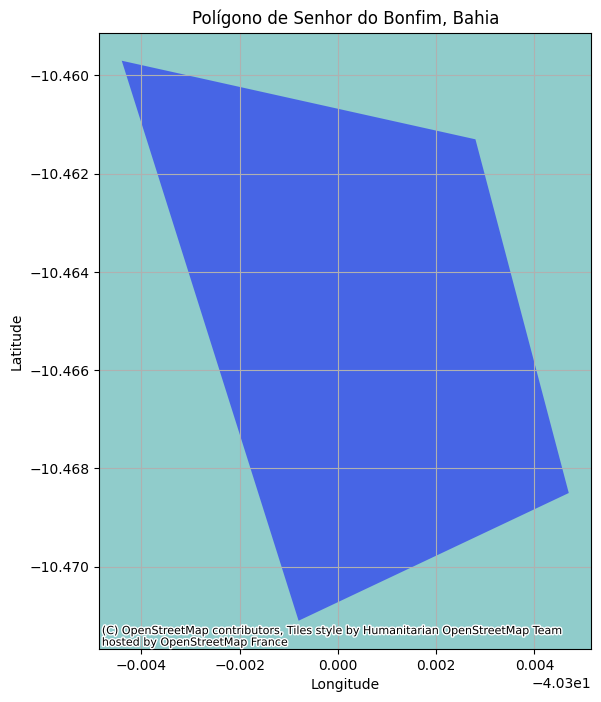

In [ ]:
# Plota o Polígono com um Mapa Base
from osgeo import ogr
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx

# Definir o caminho do shapefile
shapefile_nome = '/content/sample_data/teste/novo_shapfile_2/novo_shapefile2.shp'

# Abrir o shapefile
gdf = gpd.read_file(shapefile_nome)

# Plotar o polígono com mapa base do OpenStreetMap
fig, ax = plt.subplots(figsize=(10, 8))

# Plotar o polígono
gdf.plot(ax=ax, color='blue', alpha=0.5)

# Adicionar mapa base do OpenStreetMap
ctx.add_basemap(ax, zoom=12)

# Adicionar título e rótulos
plt.title('Senhor do Bonfim, Bahia')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

plt.show()


#Manipulação de dados do tipo vetor utilizando a biblioteca Geomet

**Instalando a Biblioteca Geomet caso ela não esteja instalada no seu ambiente**

In [4]:
!pip install geomet


**Leitura e escrita de Shapefile:**

In [56]:
import os

diretorio = '/content/sample_data/shapfiles/reg_bahia'

# Listar arquivos dentro do diretório
arquivos = os.listdir(diretorio)
print(arquivos)


['gisdb_dados_sei_REG_MUN_A_100K_2022_GCS_SIR_SEI.shp.xml', 'gisdb_dados_sei_REG_MUN_A_100K_2022_GCS_SIR_SEI.prj', 'gisdb_dados_sei_REG_MUN_A_100K_2022_GCS_SIR_SEI.sbx', 'gisdb_dados_sei_REG_MUN_A_100K_2022_GCS_SIR_SEI.shp', 'gisdb_dados_sei_REG_MUN_A_100K_2022_GCS_SIR_SEI.dbf', 'gisdb_dados_sei_REG_MUN_A_100K_2022_GCS_SIR_SEI.cpg', 'gisdb_dados_sei_REG_MUN_A_100K_2022_GCS_SIR_SEI.sbn', 'gisdb_dados_sei_REG_MUN_A_100K_2022_GCS_SIR_SEI.shx']


In [ ]:
import shapefile

# Caminho para o arquivo Shapefile (.shp)
caminho_shapefile = "/content/sample_data/shapfiles/reg_bahia/gisdb_dados_sei_REG_MUN_A_100K_2022_GCS_SIR_SEI.shp"

# Leitura do arquivo Shapefile
with shapefile.Reader(caminho_shapefile, encoding='latin1') as shp:
    # Iterando sobre os registros
    for shape_record in shp.shapeRecords():
        # Obtendo a geometria e exibindo o tipo
        geometria = shape_record.shape
        print("Tipo de geometria:", geometria.shapeType)

In [55]:
from geomet import wkt
import shapefile

# Caminho para o arquivo Shapefile (.shp)
caminho_shapefile = "/content/sample_data/shapfiles/reg_bahia/gisdb_dados_sei_REG_MUN_A_100K_2022_GCS_SIR_SEI.shp"

# Leitura do arquivo Shapefile
with shapefile.Reader(caminho_shapefile, encoding='latin1') as shp:
    # Obtendo a lista de tuplas de geometria e registros
    data = wkt.loads(f.read())
    shape_records = shp.shapeRecords()

# Exibindo o número de geometrias e registros
print("Número de geometrias:", len(shape_records))
print("Número de registros:", len(shape_records))



Número de geometrias: 417
Número de registros: 417


In [64]:
# Caminho para o arquivo Shapefile (.shp) original
caminho_shapefile_original = "/content/sample_data/shapfiles/reg_bahia/gisdb_dados_sei_REG_MUN_A_100K_2022_GCS_SIR_SEI.shp"

# Leitura do arquivo Shapefile original
with shapefile.Reader(caminho_shapefile_original, encoding='latin1') as shp:
    # Obtendo os campos e geometrias do arquivo original
    fields = shp.fields[1:]
    field_names = [field[0] for field in fields]
    geometries = [record.shape.__geo_interface__ for record in shp.iterShapeRecords()]

In [ ]:
geometries

In [70]:
# Escrita do novo arquivo Shapefile
# Caminho para o novo arquivo Shapefile (.shp)
caminho_novo_shapefile = "dados_saida.shp"
with shapefile.Writer(caminho_novo_shapefile) as writer:
    # Adicionando os campos ao arquivo DBF
    for field in fields:
        writer.field(*field)
    # Escrevendo as geometrias e registros
    for geometry in geometries:
        # Escrevendo a geometria
        writer.shape(geometry)
        # Escrevendo o registro vazio (ainda não implementado)
        writer.record()

In [73]:
import shapefile

# Caminho para o arquivo Shapefile (.shp) original
caminho_shapefile_original = "/content/sample_data/shapfiles/reg_bahia/gisdb_dados_sei_REG_MUN_A_100K_2022_GCS_SIR_SEI.shp"
# Caminho para o novo arquivo Shapefile (.shp)
caminho_novo_shapefile = "dados_saida.shp"

# Leitura do arquivo Shapefile original
with shapefile.Reader(caminho_shapefile_original, encoding='utf-8') as shp:
    # Obtendo os campos e geometrias do arquivo original
    fields = shp.fields[1:]
    field_names = [field[0] for field in fields]
    geometries_with_attributes = [(record.shape, record.record) for record in shp.iterShapeRecords()]

# Escrita do novo arquivo Shapefile
with shapefile.Writer(caminho_novo_shapefile) as writer:
    # Adicionando os campos ao arquivo DBF
    for field in fields:
        writer.field(*field)

    # Escrevendo as geometrias e registros
    for geometry, attributes in geometries_with_attributes:
        # Escrevendo a geometria
        writer.shape(geometry)
        # Escrevendo o registro com os atributos associados
        writer.record(*attributes)


In [ ]:
geometries_with_attributes

In [77]:
import shapefile

# Caminho para o arquivo Shapefile (.shp) original
caminho_shapefile_original = "/content/sample_data/shapfiles/reg_bahia/gisdb_dados_sei_REG_MUN_A_100K_2022_GCS_SIR_SEI.shp"
# Caminho para o novo arquivo Shapefile (.shp)
caminho_novo_shapefile = "/content/sample_data/shapfiles/reg_bahia/dados_saida_atributos.shp"

# Leitura do arquivo Shapefile original
with shapefile.Reader(caminho_shapefile_original, encoding='utf-8') as shp:
    # Obtendo os campos e geometrias do arquivo original
    fields = shp.fields[1:]
    field_names = [field[0] for field in fields]
    geometries_with_attributes = [(record.shape, record.record) for record in shp.iterShapeRecords()]

# Depuração: exibindo as geometrias e atributos
for geometry, attributes in geometries_with_attributes:
    print("Geometria:", geometry)
    print("Atributos:", attributes)

# Escrita do novo arquivo Shapefile
with shapefile.Writer(caminho_novo_shapefile) as writer:
    # Adicionando os campos ao arquivo DBF
    for field in fields:
        writer.field(*field)

    # Escrevendo as geometrias e registros
    for geometry, attributes in geometries_with_attributes:
        # Depuração: exibindo geometria e atributos antes de gravar
        print("Gravando geometria:", geometry)
        print("Gravando atributos:", attributes)

        # Escrevendo a geometria
        writer.shape(geometry)
        # Escrevendo o registro com os atributos associados
        writer.record(*attributes)


Geometria: Shape #0: POLYGON
Atributos: Record #0: ['2923001', 'Nova Viçosa', '2907', 'Sul Baiano', '29032', 'Porto Seguro', '2903', 'Ilhéus – Itabuna', '290008', 'Teixeira de Freitas', 'NÃ', 'NÃ', '7', 'Extremo Sul', '5', 'Extremo Sul', '9', 'Teixeira de Freitas', '', 'Extremo Sul', '7', 'Teixeira de Freitas', '3', 'Extremo sul', '0', 'Teixeira de Freitas', '', '', 0.112292117999, 2.07871162603]
Geometria: Shape #1: POLYGON
Atributos: Record #1: ['2922003', 'Mucuri', '2907', 'Sul Baiano', '29032', 'Porto Seguro', '2903', 'Ilhéus – Itabuna', '290008', 'Teixeira de Freitas', 'NÃ', 'NÃ', '7', 'Extremo Sul', '5', 'Extremo Sul', '9', 'Teixeira de Freitas', '', 'Extremo Sul', '7', 'Teixeira de Freitas', '3', 'Extremo sul', '0', 'Teixeira de Freitas', '', '', 0.148911902446, 2.49308304709]
Geometria: Shape #2: POLYGON
Atributos: Record #2: ['2912806', 'Ibirapoã', '2907', 'Sul Baiano', '29032', 'Porto Seguro', '2903', 'Ilhéus – Itabuna', '290008', 'Teixeira de Freitas', 'NÃ', 'NÃ', '7', 'Extr